<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">Dans cette partie, nous nous intéressons à la visualisation des données ainsi qu'à l'analyse descriptive du jeu de données "merged_data" obtenu suite au nettoyage des bases de données initiales du fichier "Préparation_données.ipynb". Pour étudier les tendances moyennes, nous allons se concentrer uniquement sur les observations de la période s'étallant de 2019 à 2023. Nous voulons à partir de cela visualiser les niveaux moyens de chomage et de croissance économique pour les cinq dernières années.Pour les autres représentations, la période considérée est celle s'étallant de 1994 à 2023. Pour cela, quatres applications ont été créées.</p>




In [107]:
# Import des packages
from importlib import reload
import Declarations as d
reload(d)

<module 'Declarations' from 'd:\\ENSAE-PARIS\\Semestre 1\\Python avec data science\\Projet_Python\\src\\Declarations.py'>

In [108]:
# Importation du jeu de données
data = d.pd.read_csv("./base/data.csv")

In [109]:
# Visualisation 
data.head()

,Country,Country_Code,Year,PIB_par_travailleur,Capital_par_travailleur,Population_travailleur
0,Albania,ALB,2023,8130.753594,2008.989312,1830356
1,Albania,ALB,2022,7693.634432,1955.422229,1861085
2,Albania,ALB,2021,7211.368890,1890.602681,1894123
3,Albania,ALB,2020,6523.372724,1558.771159,1921536
4,Albania,ALB,2019,6679.059681,1556.807023,1941067


<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">I- Présentation</h1>

In [110]:
# Dimensions
data.shape

(3978, 6)

In [111]:
# Informations sur la DF (nombre de valeurs non nulles, type de données de chaque colonne...)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3978 entries, 0 to 3977
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3978 non-null   object 
 1   Country_Code             3978 non-null   object 
 2   Year                     3978 non-null   int64  
 3   PIB_par_travailleur      3978 non-null   float64
 4   Capital_par_travailleur  3978 non-null   float64
 5   Population_travailleur   3978 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 186.6+ KB


In [112]:
# Générer des statistiques descriptives récapitulatives d'une DataFrame
data.describe()

,Year,PIB_par_travailleur,Capital_par_travailleur,Population_travailleur
count,3978.000000,3978.000000,3978.000000,3.978000e+03
mean,2006.500000,22153.828257,4838.793743,2.447700e+07
std,9.811942,28195.604973,6349.347076,7.459113e+07
min,1990.000000,394.964216,-17.249099,4.215900e+04
25%,1998.000000,3396.523462,729.406423,2.340246e+06
50%,2006.500000,9119.576579,1925.920685,6.333687e+06
75%,2015.000000,31001.155969,6582.604593,2.096231e+07
max,2023.000000,166018.899443,59938.616023,9.781907e+08


In [113]:
# Étape 1: Télécharger le fichier ZIP depuis Natural Earth
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
zip_file_path = "ne_110m_admin_0_countries.zip"

response = d.requests.get(url)
with open(zip_file_path, "wb") as file:
    file.write(response.content)
print("Téléchargement terminé.")

# Étape 2: Extraire le fichier ZIP
extract_dir = "natural_earth"
if not d.os.path.exists(extract_dir):
    d.os.makedirs(extract_dir)

with d.zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extraction terminée.")

# Étape 3: Charger les données avec GeoPandas
shapefile_path = d.os.path.join(extract_dir, "ne_110m_admin_0_countries.shp")
world = d.gpd.read_file(shapefile_path)

# Transformer les coordonnées géographiques en coordonnées projetées
world.to_crs('EPSG:4326') 

Téléchargement terminé.
Extraction terminée.


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [114]:
# Renommer des colonnes spécifiques
world = world.rename(columns={"NAME_FR": "Country", "CONTINENT": "Continent", "ISO_A3": "Country_Code"})

# Sélectionner certaines colonnes
my_columns = ['geometry', 'Country','Country_Code', 'Continent']
world = world[my_columns]


In [115]:
# Visualiser la base
world.head()

,geometry,Country,Country_Code,Continent
0,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fidji,FJI,Oceania
1,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzanie,TZA,Africa
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Sahara occidental,ESH,Africa
3,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America
4,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",États-Unis,USA,North America


In [116]:
# Fusionner les deux DataFrames
world_df = d.pd.merge(world, data, how='inner', on=['Country_Code', 'Country'])

In [117]:
# Visualisation
print(f"La base contient {world_df.shape[1]} ")
world_df.head()

La base contient 8 


,geometry,Country,Country_Code,Continent,Year,PIB_par_travailleur,Capital_par_travailleur,Population_travailleur
0,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2023,68060.239277,14321.747408,26198809
1,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2022,69037.119136,15193.653825,25509499
2,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2021,67441.809946,15780.814959,25152138
3,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2020,64056.887481,14438.304461,25151490
4,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2019,67835.606819,15087.754623,25010539


<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">II- Visualisations </h1>

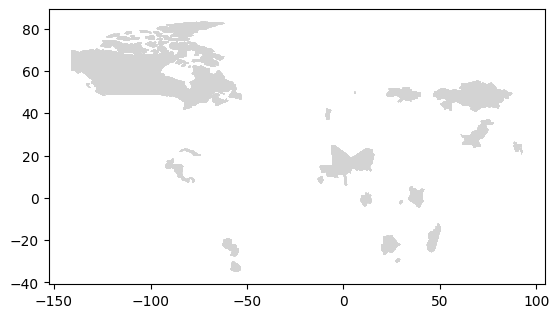

In [118]:
# Plot
world_df.plot(color='lightgrey')
d.plt.show()

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">II.1- <u>Visualisation des différentes indicateurs pour tous les pays</u></h2>
<br/>

In [119]:
# Créer un Dash app
app1 = d.dash.Dash(__name__)

# Définir le layout 
app1.layout = d.html.Div([
    # Sélecteur d'année
    d.dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in sorted(world_df['Year'].unique())],
        value=world_df['Year'].min(),  #valeur par defaut de l'année
        multi=False,
    ),
    # Sélecteur de variables
    d.dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'PIB par travailleur', 'value': 'PIB_par_travailleur'},
            {'label': 'Capital par travailleur', 'value': 'Capital_par_travailleur'},
            {'label': 'Population des travailleurs', 'value': 'Population_travailleur'}
          
        ],
        value='PIB_par_travailleur',  # valeur par défaut de la variable representée
        multi=False,
    ),
    d.dcc.Graph(id='choropleth-map'),
])

# Définir un callback  pour mettre à jour la carte sur l'année selectionnée 
@app1.callback(
    d.Output('choropleth-map', 'figure'),
    [d.Input('year-dropdown', 'value'),
     d.Input('variable-dropdown', 'value')]
)
def update_map(selected_year, selected_variable):
    subset_gdf = world_df[world_df['Year'] == selected_year]
    subset_gdf.index = subset_gdf['Country']
    fig = d.px.choropleth(
        subset_gdf,
        geojson=subset_gdf.geometry,
        locations=subset_gdf.index,
        color=selected_variable,
        projection="natural earth",
        title=f'{selected_variable} in {selected_year}',
    )
    fig.update_geos(fitbounds="locations", visible=True)
  
    fig.update_layout ( margin = { "r" : 0 , "t" : 0 , "l" : 0 , "b" : 0 }) 
    
    return fig

# Exécuter l'application
if __name__ == '__main__':
    app1.run_server(debug=True, port=8051)

OSError: Address 'http://127.0.0.1:8051' already in use.
    Try passing a different port to run_server.

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">II.2- <u>Evolution des indicateurs de 1990 à 2023 pour chaque continent</u></h2>
<br/>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">La deuxième application consiste à créer une application web interactive affichant les plots des séries temporelles des différents indicateurs pour différents pays.</p>




In [85]:
world_df.head()

,geometry,Country,Country_Code,Continent,Year,PIB_par_travailleur,Capital_par_travailleur,Population_travailleur
0,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2023,68060.239277,14321.747408,26198809
1,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2022,69037.119136,15193.653825,25509499
2,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2021,67441.809946,15780.814959,25152138
3,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2020,64056.887481,14438.304461,25151490
4,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,CAN,North America,2019,67835.606819,15087.754623,25010539


In [ ]:
# Créer un Dash app
app2 = d.dash.Dash(__name__)

# Créer le graphique initial
fig = d.px.line(world_df, x='Year', y=["PIB_par_travailleur"], color='Country')

# Créer la mise en page de votre application Dash
app2.layout = d.html.Div([
    # Sélecteur de continents
    d.dcc.Dropdown(
        id='continent-selector',
        options=[
            {'label': continent, 'value': continent}
            for continent in world_df['Continent'].unique()
        ],
        multi=True,
        value=world_df['Continent'].unique()  # Sélectionner tous les continents par défaut
    ),
    # Sélecteur de variables
    d.dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'PIB par travailleur', 'value': 'PIB_par_travailleur'},
            {'label': 'Capital par travailleur', 'value': 'Capital_par_travailleur'},
            {'label': 'Population des travailleurs', 'value': 'Population_travailleur'}
          
        ],
        value='PIB_par_travailleur',  # Valeur par defaut de la variable representée
        multi=False,
    ),
    
    # Graphique
    d.dcc.Graph(
        id='line-chart',
        figure=fig
    )
])

# Définir la logique de la mise à jour du graphique en fonction de la sélection du sélecteur
@app2.callback(
    d.Output('line-chart', 'figure'),
    [d.Input('variable-dropdown', 'value'),
     d.Input('continent-selector', 'value')]
)
def update_graph2(selected_variable, selected_continents):
    filtered_df = world_df[world_df['Continent'].isin(selected_continents)]
    fig = d.px.line(filtered_df, x='Year', y=selected_variable, color='Country',
                   labels={'Year': 'Année', selected_variable : f"{selected_variable}"})
    
    
    return fig


# Exécuter l'application Dash
if __name__ == '__main__':
    app2.run_server(debug=True, port=8052)

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">III- <u>Analyse descriptive</u></h1>
<br/>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">Rappelons notre objectif qui est de vérifier empiriquement les résultats du modèle de Solow. Nous allons analyser pour chaque indicateur la série brute sur la période considérée et la série lissée par une moyenne mobile d'ordre 6. En effet Les cycles économiques à long terme (comme les récessions ou expansions) sont souvent de l'ordre de 5 à 10 ans. Un lissage sur 6 ans nous permettra d'observer ces tendances sans trop supprimer les informations utiles. De plus cet ordre permet de minimiser l'impact des variations annuelles ou des événements exceptionnels (comme une crise économique ponctuelle). <br>
Pour ce qui est de l'analysee des séries temporelles, nous utilisons la fonction 'analyse_serie_temporelle' du fichier 'Declarations' qui prend en arguments le jeu de données, l'indicateur (PIB par tete, Capital par tête, ...) et le pays à considérer puis renvoie le graphe:
</p>

<ul>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">de la série temporelle brute,</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">de la série temporelle lissée par une moyenne mobile d'ordre 6,</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">de la décomposition de la série temporelle en composante saisonnière, composante tendancielle et rédisuelle.</li>
</ul>


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">Enfin, elle permet de tester la stationnarité de la série (Augmented Dickey-Fuller test).</p> <br>

<h3 style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; "><u><strong>APARTE</strong></u></h3>


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; "><b>Hypothèses du Test de Dickey-Fuller Augmenté (ADF)</b></p>

<div style="margin-left: 20px;">

- <p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; "><b><em>H_0: </em></b>La série temporelle a une racine unitaire, ce qui indique la non-stationnarité.</p>


- <p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; "><b><em>H_1: </em></b>La série temporelle n'a pas de racine unitaire, ce qui indique la stationnarité.</p> 
    </div>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; "><b>Interprétation des résultats :</b></p>

<div style="margin-left: 20px;">

<ul>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">Si la statistique du test est inférieure à la valeur critique au seuil de signification (par exemple, 0.05), on rejette l'hypothèse nulle et conclut que la série temporelle est stationnaire.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">Sinon, on ne peut pas rejeter l'hypothèse nulle, cela suggère que la série temporelle est non stationnaire.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px; ">Le test est implémenté par la bibliothèque Statsmodels de Python.</li>
</ul>



In [94]:
data['Country_Code'].unique()

array(['ALB', 'DZA', 'ARG', 'ARM', 'AUS', 'AUT', 'BHS', 'BGD', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'KHM', 'CMR', 'CAN', 'CHL', 'COL', 'COM', 'COD', 'COG', 'CRI',
       'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DOM', 'ECU', 'EGY',
       'SLV', 'EST', 'FIN', 'FRA', 'GAB', 'DEU', 'GRC', 'GTM', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA',
       'JPN', 'KAZ', 'KEN', 'KOR', 'LVA', 'LBN', 'LSO', 'LTU', 'LUX',
       'MAC', 'MDG', 'MYS', 'MLI', 'MRT', 'MUS', 'MEX', 'MDA', 'MAR',
       'NAM', 'NLD', 'NZL', 'NIC', 'NER', 'MKD', 'NOR', 'PAK', 'PAN',
       'PRY', 'PER', 'POL', 'PRT', 'PRI', 'ROU', 'RUS', 'RWA', 'SEN',
       'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'ZAF', 'ESP',
       'SWE', 'CHE', 'SYR', 'TZA', 'THA', 'TGO', 'TON', 'TUN', 'TUR',
       'UGA', 'UKR', 'GBR', 'USA', 'URY', 'UZB', 'VNM', 'PSE', 'YEM'],
      dtype=object)

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">III.1- <u>Démonstration</u></h2>
<br/>

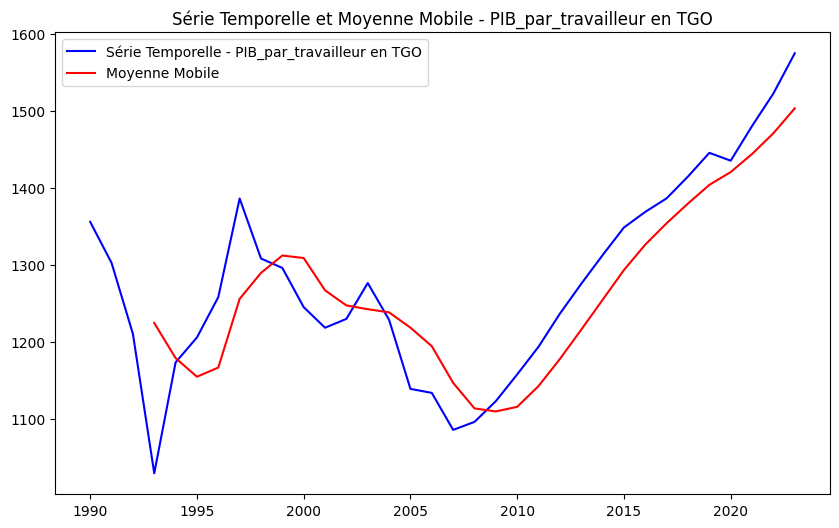

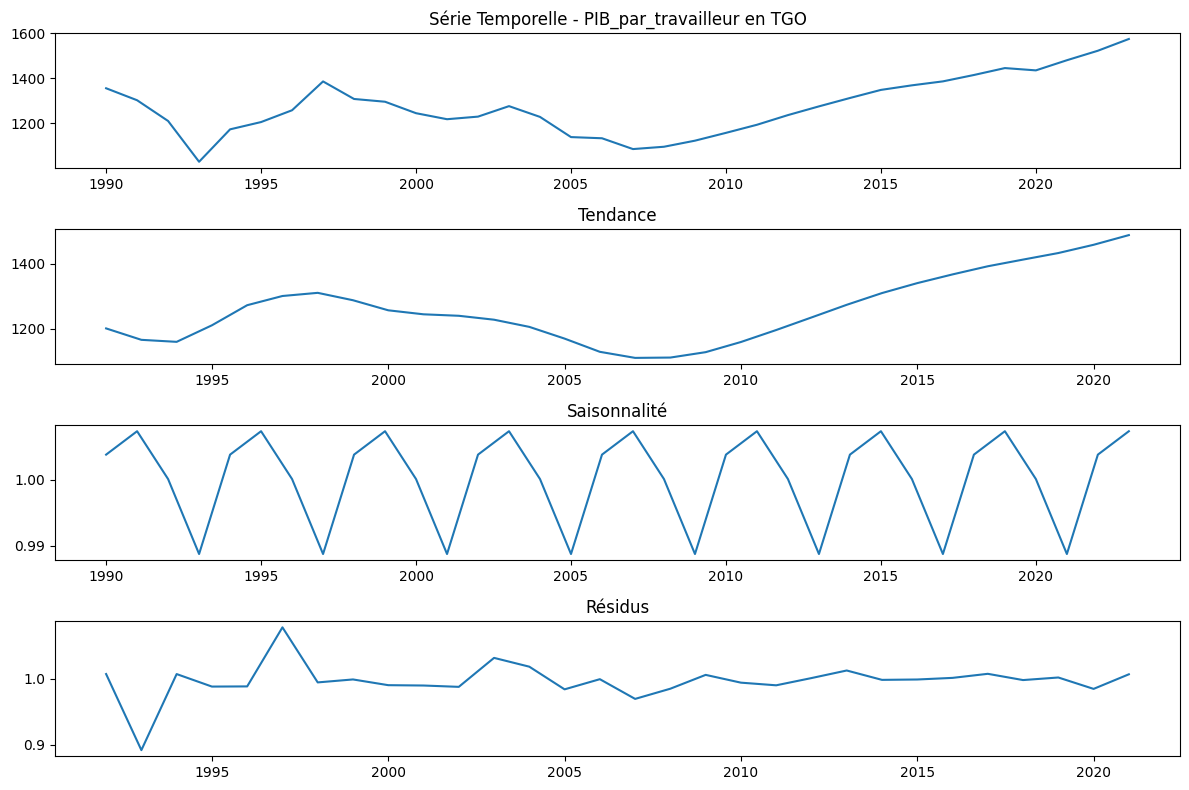

Test de Dickey-Fuller Augmenté:
Statistique de test = 2.2283773485074514
Valeur critique (5%) = -2.998499866852963


In [ ]:
d.analyse_serie_temporelle(data,'PIB_par_travailleur', 'TGO')

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">III.2- <u>Application</u></h1>
<br/>

In [102]:
pays_disponibles = dict(zip(data['Country_Code'], data['Country']))
print(len(pays_disponibles))

117


In [106]:
# Créer un Dash app
app = d.dash.Dash(__name__)

# Créer un dictionnaire avec 'Country_Code' comme clé et 'Country' comme valeur
pays_disponibles = dict(zip(data['Country_Code'], data['Country']))

app.layout = d.html.Div([
    d.html.H1("Analyse de Série Temporelle"),
    
    
   # Sélecteur de variables
    d.dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'PIB par travailleur', 'value': 'PIB_par_travailleur'},
            {'label': 'Capital par travailleur', 'value': 'Capital_par_travailleur'},
            {'label': 'Population des travailleurs', 'value': 'Population_travailleur'}
          
        ],
        value='PIB_par_travailleur',  # valeur par defaut de la variable representée
        multi=False,
    ),
    
    
    # Sélection du pays
    d.html.Label("Choisissez le pays :"),
    d.dcc.Dropdown(
        id='dropdown-pays',
        options = [
            {'label': pays_disponibles[pays], 'value': pays} for pays in pays_disponibles
        ],

        value=next(iter(pays_disponibles))  # Cela prendra la première clé du dictionnaire
    ),
    
    # Graphiques
    d.dcc.Graph(id='time-series-plot'),
    d.dcc.Graph(id='decomposition-plot'),
])

@app.callback(
    [d.Output('time-series-plot', 'figure'),
     d.Output('decomposition-plot', 'figure')],
    [d.Input('variable-dropdown', 'value'),
     d.Input('dropdown-pays', 'value')]
)
def update_graph(indicateur, pays):
    # Sélectionner la série temporelle du pays spécifique
    serie_temporelle = data[indicateur].dropna()
    
    # Moyenne mobile d'ordre 4
    rolling_mean = serie_temporelle.rolling(window=4).mean()

    # Créer le premier graphique (série temporelle et moyenne mobile)
    time_series_fig = d.px.line(x=serie_temporelle.index, y=[serie_temporelle, rolling_mean],
                              labels={'variable': 'Type', 'value': 'Valeur'},
                              title=f'Série Temporelle et Moyenne Mobile - {indicateur} en {pays}',
                              color_discrete_map={'0': 'blue', '1': 'red'})
    
    # Décomposition saisonnière
    decomposition = d.seasonal_decompose(serie_temporelle, model='multiplicative', period=4)

    # Créer le deuxième graphique (décomposition)
    decomposition_fig = d.px.line(x=serie_temporelle.index, y=[decomposition.trend, decomposition.seasonal, decomposition.resid],
                                labels={'variable': 'Composant', 'value': 'Valeur'},
                                title=f'Décomposition - {indicateur} en {pays}',
                                color_discrete_map={'0': 'green', '1': 'orange', '2': 'gray'})

    return time_series_fig, decomposition_fig

if __name__ == '__main__':
    app.run_server(debug=True, port = 8053)